In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_merge = pd.read_csv('data_processed/merged_pull_requests.csv')
df_unmerge = pd.read_csv('data_processed/unmerged_pull_requests.csv')
df_pull = pd.read_csv('data_processed/pull_requests.csv')

### Số pulls đóng và mở

In [3]:
open = df_pull[df_pull['state']=='open'].shape[0]
closed = df_pull[df_pull['state']=='closed'].shape[0]
open, closed

(199, 14673)

### Tỷ lệ pulls đóng và chưa đóng

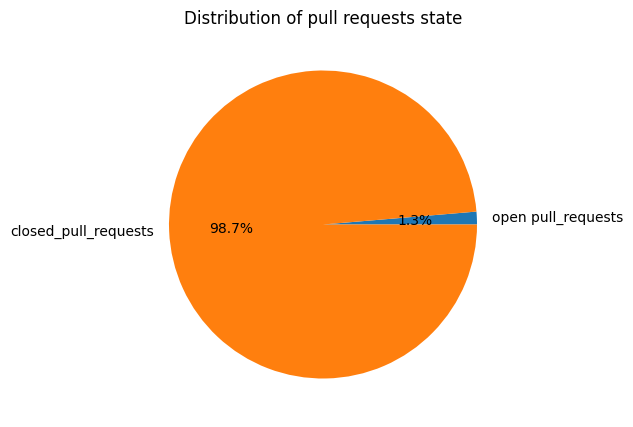

In [4]:
state = [open,closed]
labels = ['open pull_requests','closed_pull_requests']

plt.figure(figsize=(5,5))
plt.pie(state,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of pull requests state")
plt.show()

### Tỷ lệ pulls được merge và chưa được merge

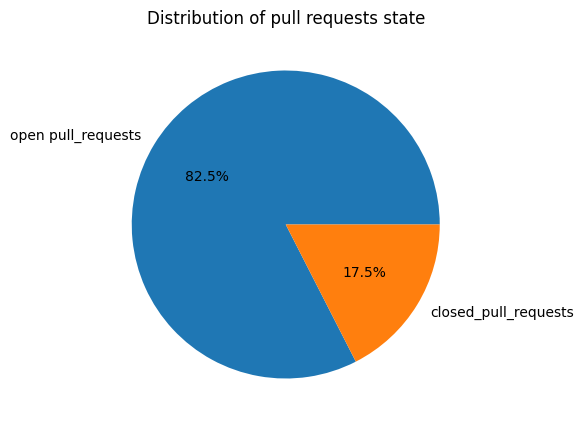

In [5]:
merge_state = [len(df_merge),len(df_unmerge)]
labels = ['open pull_requests','closed_pull_requests']

plt.figure(figsize=(5,5))
plt.pie(merge_state,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of pull requests state")
plt.show()

### Từ xuất hiện nhiều nhất trong các title

In [6]:
words = [x.split()[0] for x in df_pull['title']]
words_with_no_duplication = pd.DataFrame(list({x:words.count(x)for x in words}.items()), columns = ['Words', 'Time'] )
words_with_no_duplication.sort_values(by = 'Time', ascending = False, inplace = True, ignore_index = True)
words_with_no_duplication.head(10)

,Words,Time
0,bug:,3022
1,doc:,2607
2,maint:,2580
3,enh:,1554
4,tst:,559
5,bld:,400
6,backport,288
7,fix,231
8,dep:,201
9,ci:,182


### Thời gian trung bình để merge 1 pull 

In [7]:
df_merge['created_at'] = pd.to_datetime(df_merge['created_at'])
df_merge['closed_at'] = pd.to_datetime(df_merge['closed_at'])
df_mean = df_merge.copy()
df_mean['solution_time'] = (df_mean['closed_at'] - df_mean['created_at']).dt.days
df_mean['solution_time'].describe()

count    12108.000000
mean        13.035349
std         72.376154
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       2031.000000
Name: solution_time, dtype: float64

### Số pulls được merge từ tháng 1 năm 2023 đến nay

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11808\2990249664.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged_issues['year_month'] = merge__issues['merged_at'].dt.to_period('M')


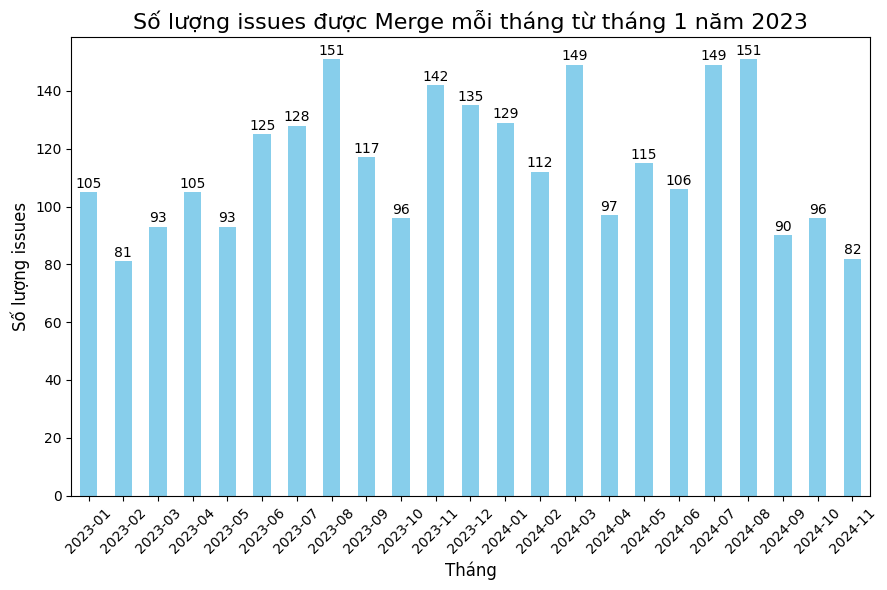

In [8]:
df_merged_issues = df_merge.copy()
df_merged_issues['merged_at'] = pd.to_datetime(df_merged_issues['merged_at'])
merge__issues = df_merged_issues[df_merged_issues['merged_at'] >= '2023-01-01']
df_merged_issues['year_month'] = merge__issues['merged_at'].dt.to_period('M')
monthly_merge_count = df_merged_issues.groupby('year_month').size()

plt.figure(figsize=(9, 6))
ax = monthly_merge_count.plot(kind='bar', color='skyblue')


for i, value in enumerate(monthly_merge_count):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)


plt.title('Số lượng issues được Merge mỗi tháng từ tháng 1 năm 2023', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng issues', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Số pulls được merge thành công theo contributors

In [19]:
merge_count_issues = df_merge.groupby('name').size().reset_index(name='merge count')
merge_count_issues = merge_count_issues.sort_values(by='merge count', ascending=False)
merge_count_issues.head(20)

,name,merge count
479,charris,2642
1412,seberg,739
633,eric-wieser,613
1080,mattip,575
918,juliantaylor,412
1341,rgommers,391
42,BvB93,297
551,dependabot[bot],219
1189,ngoldbaum,186
258,WarrenWeckesser,160


### 

### Phân phối thời gian merge

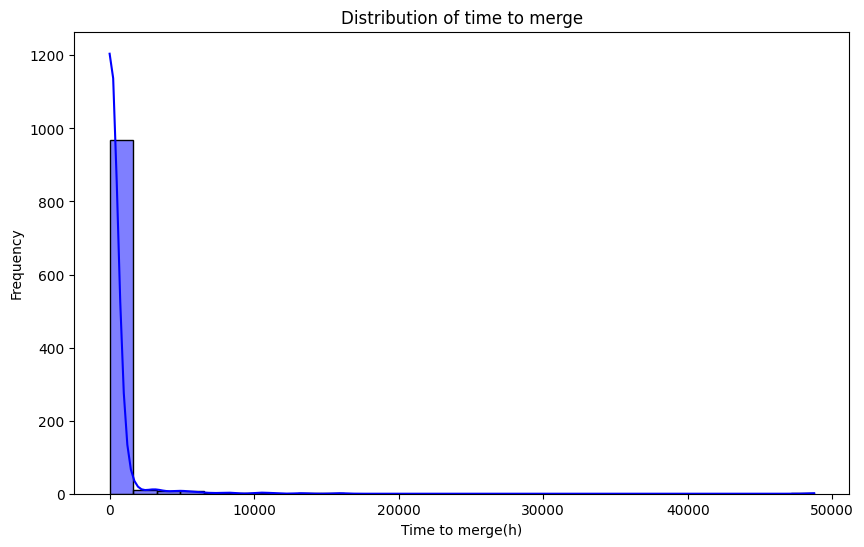

In [22]:
sampled_df = df_merge.sample(n=1000, random_state=42)

# Vẽ biểu đồ từ mẫu
plt.figure(figsize=(10, 6))
sns.histplot(sampled_df['time_to_merge'], bins=30, kde=True, color='blue')
plt.title('Distribution of time to merge')
plt.xlabel('Time to merge(h)')
plt.ylabel('Frequency')
plt.show()

Hiệu suất nhóm phát triển: Phần lớn các pull requests chỉ cần rất ít thời gian để merge, điều này cho thấy hiệu suất làm việc cao.
Phát hiện vấn đề: Một số pull requests cần nhiều thời gian để merge.
Tối ưu hóa quy trình: Biểu đồ này giúp xác định mức độ đồng đều trong thời gian xử lý pull requests, từ đó đưa ra quyết định tối ưu hóa quy trình làm việc.

### Xu hướng trung bình thời gian để merge các pulls hàng tuần 

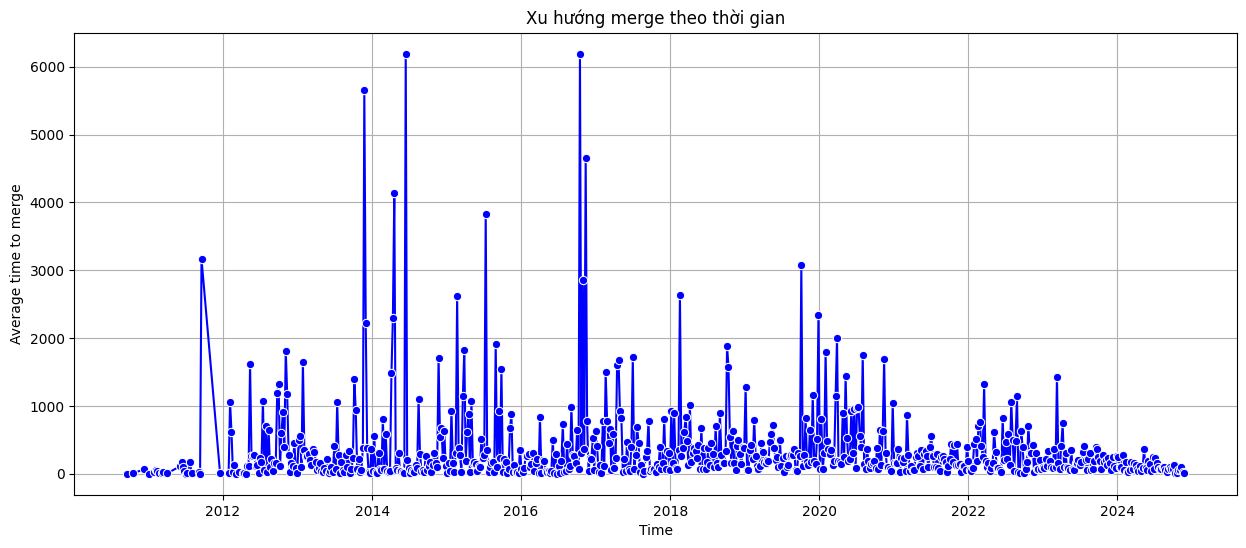

In [6]:
df_merge['created_at'] = pd.to_datetime(df_merge['created_at'])

trend_merge_df = df_merge.groupby(pd.Grouper(key='created_at', freq='W'))['time_to_merge'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=trend_merge_df, x='created_at', y='time_to_merge', marker='o', color='blue')
plt.title('Xu hướng merge theo thời gian')
plt.xlabel('Time')
plt.ylabel('Average time to merge')
plt.grid(True)
plt.show()
